In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath="/Users/mitsuki/rsyncdir/files/out.csv"
df=pd.read_csv(filepath)
df.head()

,ftp_basename,G+C,taxid,count_diff,0->0,0->1,0->2,0->3,0->4,0->5,...,15->6,15->7,15->8,15->9,15->10,15->11,15->12,15->13,15->14,15->15
0,GCF_000022385.1_ASM2238v1,0.351110,429572,-0.001742,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCF_000970085.1_ASM97008v1,0.429404,1434120,0.021201,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCF_000007345.1_ASM734v1,0.426809,188937,0.019879,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCF_000350305.1_ASM35030v1,0.583030,1054217,0.250406,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCF_000969905.1_ASM96990v1,0.397795,1434123,0.008531,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## check validity of count_diff

In [8]:
columns_lst=[]
for i in range(16):
    for j in range(16):
        columns_lst.append("{}->{}".format(i,j))
df[columns_lst].sum(axis=1).head()

0   -0.001742
1    0.021201
2    0.019879
3    0.250406
4    0.008531
dtype: float64

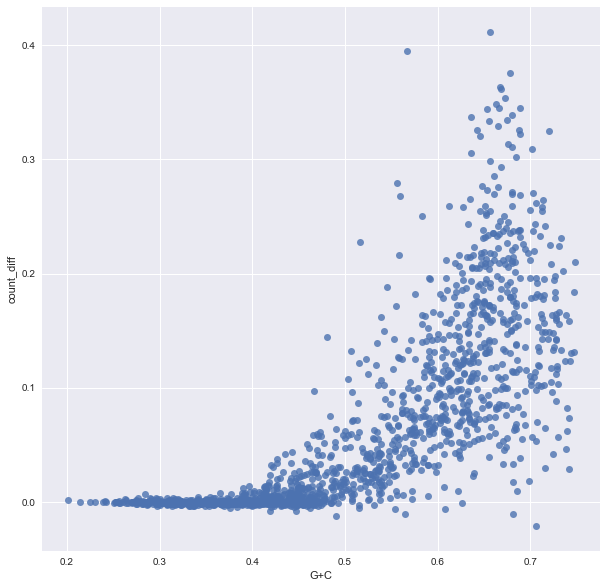

In [11]:
plt.figure(figsize=(10,10))
sns.regplot("G+C","count_diff",data=df,fit_reg=False)
plt.show()

In [16]:
df[columns_lst].describe()

count    1571.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 0->3, dtype: float64

In [17]:
patternDegs_lst=['000000',
                                '100000',
                                '110000',
                                '100100','100010','100001',
                                '111000',
                                '110100','110010','110001',
                                '111100',
                                '110110','110011','110101',
                                '111110',
                                '111111']

In [19]:
patternDegs_lst[15]

'111111'

In [59]:
target_lst=[]
for i in range(16):
    for j in range(16):
        clm="{0}->{1}".format(i,j)
        thres=0.05
        overThresCount=np.sum(df[clm]>thres)
        if overThresCount>0:
            print("{0}->{1}: {2}".format(patternDegs_lst[i], patternDegs_lst[j], overThresCount))
            target_lst.append((i,j))
print(target_lst)

100100->100000: 125
110010->100000: 171
110010->100100: 139
[(3, 1), (8, 1), (8, 3)]


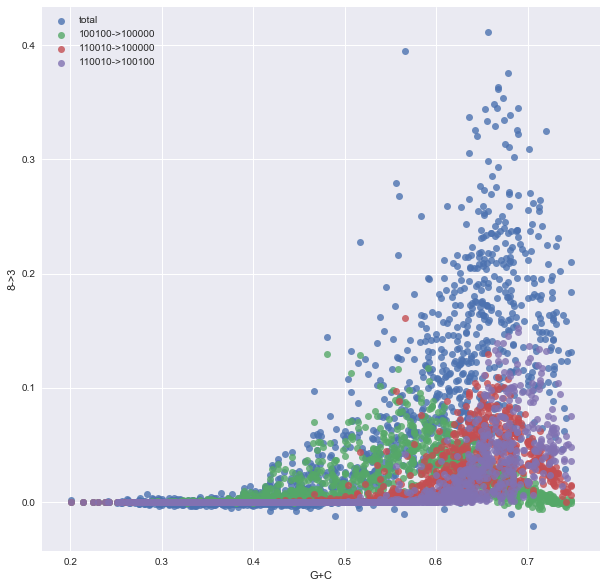

In [60]:
plt.figure(figsize=(10,10))
sns.regplot("G+C","count_diff",data=df,fit_reg=False, label="total")

for i,j in target_lst:
    clm="{0}->{1}".format(i,j)
    label="{0}->{1}".format(patternDegs_lst[i], patternDegs_lst[j])
    sns.regplot("G+C",clm,data=df,fit_reg=False, label=label)
    #sns.regplot("G+C",clm,data=df,fit_reg=False, label=clm)
        
plt.legend()
plt.show()

In [61]:
df.head()

,ftp_basename,G+C,taxid,count_diff,0->0,0->1,0->2,0->3,0->4,0->5,...,15->6,15->7,15->8,15->9,15->10,15->11,15->12,15->13,15->14,15->15
0,GCF_000022385.1_ASM2238v1,0.351110,429572,-0.001742,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCF_000970085.1_ASM97008v1,0.429404,1434120,0.021201,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCF_000007345.1_ASM734v1,0.426809,188937,0.019879,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCF_000350305.1_ASM35030v1,0.583030,1054217,0.250406,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCF_000969905.1_ASM96990v1,0.397795,1434123,0.008531,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df["remain"]=df["count_diff"]-(df["3->1"]+df["8->1"]+df["8->3"])

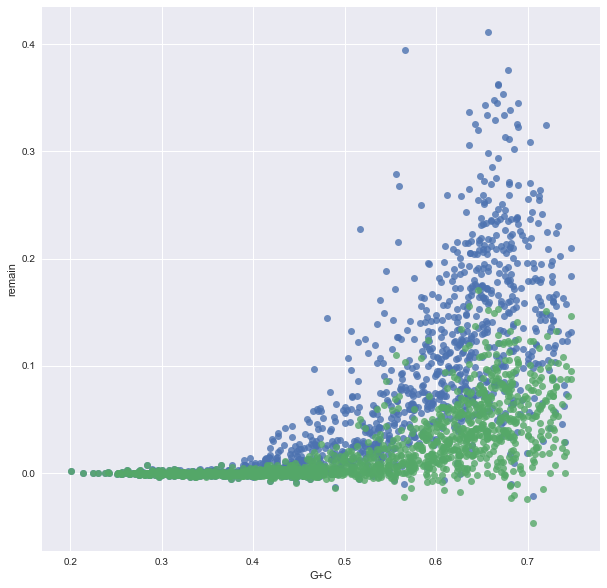

In [65]:
plt.figure(figsize=(10,10))
sns.regplot("G+C","count_diff",data=df,fit_reg=False, label="total")
sns.regplot("G+C","remain",data=df,fit_reg=False, label="remain")

125

In [89]:
for key, val in  (df.loc[np.argmax(df["remain"]),columns_lst]).iteritems():
    thres=0.005
    if val>thres:
        i,j=[int(_) for _ in  key.split("->")]
        label="{0}->{1}".format(patternDegs_lst[i], patternDegs_lst[j])
        print("{0} ({1}) : {2}".format(label, key, val))

100000->000000 (1->0) : 0.03162247937380712
110000->000000 (2->0) : 0.005761529411683906
110000->100000 (2->1) : 0.026583459074185616
100100->100000 (3->1) : 0.023827004396179498
100010->000000 (4->0) : 0.019875868539054986
100010->100000 (4->1) : 0.010980833591454063
110010->100000 (8->1) : 0.10133190296675153
110010->110000 (8->2) : 0.005222738158439655
110010->100100 (8->3) : 0.023756607833454783
110001->100000 (9->1) : 0.005054816601501198
111100->100000 (10->1) : 0.009904281278566409
110110->100000 (11->1) : 0.005470328020510468
